In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("pop_input.csv")
display(df.head())
display(df.info())
display(df['Artist Followers'].unique())

,Unnamed: 0,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Normalized_loud
0,0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B,0.763187
1,1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,...,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db,0.737844
2,2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,...,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A,0.754339
3,3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,...,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B,0.804274
4,4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,...,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,0.665679


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1545 non-null   int64  
 1   Index                      1545 non-null   int64  
 2   Highest Charting Position  1545 non-null   int64  
 3   Number of Times Charted    1545 non-null   int64  
 4   Week of Highest Charting   1545 non-null   object 
 5   Song Name                  1545 non-null   object 
 6   Streams                    1545 non-null   object 
 7   Artist                     1545 non-null   object 
 8   Artist Followers           1545 non-null   int64  
 9   Song ID                    1545 non-null   object 
 10  Genre                      1545 non-null   object 
 11  Release Date               1545 non-null   object 
 12  Weeks Charted              1545 non-null   object 
 13  Popularity                 1545 non-null   int64

None

array([ 3377762,  2230022,  6266514, 83293380,  5473565,  8640063,
        6080597, 36142273, 27142474, 29051363, 37106176, 48504126,
       35305637,  2123734,   151486,  1890510, 10502148, 33651775,
          83689,   365975, 32574754, 22683756, 16216789, 16112621,
        4840346,  8758283,  2936204,  5785065,  3120157,  1274433,
         375865,  6929075,   389076,  3126961,    45362, 47014200,
          32178, 31541310,   495226,   409173, 32262679, 12169108,
        4787261,   291777,  1398563,  1250353,   116817,  6662605,
       26769304,  8384096,    26131,   408696, 17775316,  2895789,
          27116,  1999954,  2043294,    31488,  2819593, 56308172,
        1042079, 17719446,   207547,    18228,   203972,   287361,
       67158068,  1329531,  6341942,  1521837,  1427540,  3363988,
          16074, 35285425,   411579,   742692, 10356559,    56699,
          73211, 21942793,  5420471, 33879560,   282045,  7593046,
        3794081,  1647262, 20270895,  2421254, 13261089,  6430

In [2]:
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import Normalizer

X = np.c_[df['Artist Followers'], df['Number of Times Charted'], df['Highest Charting Position']]
y = np.c_[df['Popularity']]


X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate a simple linear regression model 
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [3]:
# train data R2
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
# test data R2
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

X_b = np.c_[np.ones((1545, 1)), X]  # add x0 = 1 to each data tuple
y_b = y.reshape(1545, 1)

transformer = Normalizer().fit(X_b)
X_b = transformer.transform(X_b)
transformer = Normalizer().fit(y_b)
y_b = transformer.transform(y_b)

print(X_b.shape, '\n', y_b.shape)

R-squared score (training): 0.068
R-squared score (test): 0.059
RMSE: 15.125
(1545, 4) 
 (1545, 1)


In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[-3.04590033e+05],
       [ 6.98487974e+01],
       [ 3.33860885e+04],
       [ 1.96753703e+03]])

In [5]:
# learning rate
alpha = 0.001

# number of iterations
n_iteration = 100

# the number of data points
n = 100

# random initialization to theta. 
# Return samples (2 values for theta0 for x0 and theta1 for x1) 
# from the “standard normal” distribution.
theta = np.random.randn(4, 1)

print('initial theta: \n', theta, theta.shape)

initial theta: 
 [[ 1.59058844]
 [-1.51648305]
 [-0.60061617]
 [-0.80687382]] (4, 1)


In [6]:
# the process of gradient descent
for iteration in range(n_iteration):
    gradient = (1/n) * X_b.T.dot(X_b.dot(theta) - y_b)
    theta = theta - alpha*gradient
    
    
print('best theta: \n', theta)

# we will need to tune with learning rate alpha and # of iterations
# to find out the optimal theta value

best theta: 
 [[ 1.59059131]
 [ 0.45133354]
 [-0.60059077]
 [-0.80662146]]


In [7]:
#Linear regression without regularization

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Popularity Dataset')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

Popularity Dataset
R-squared score (training): 0.065
R-squared score (test): 0.064
RMSE: 14.306
linear model intercept: [67.43212833]
linear model coeff:
[[ 1.13932791e-07  1.84203732e-01 -1.20531617e-02]]
Number of non-zero features: 3


In [9]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Cancer Dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Cancer Dataset
R-squared score (training): 0.065
R-squared score (test): 0.064
RMSE: 14.306
ridge regression linear model intercept: [67.43243981]
ridge regression linear model coeff:
[[ 1.13931971e-07  1.84190185e-01 -1.20548494e-02]]
Number of non-zero features: 3


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Cancer Dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Cancer Dataset
R-squared score (training): 0.053
R-squared score (test): 0.049
RMSE: 14.306
ridge regression linear model intercept: [70.2312555]
ridge regression linear model coeff:
[[ 6.31582404 10.85914739 -4.66749578]]
Number of non-zero features: 3


In [11]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 0.01, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 0.01
num abs(coeff) > 1.0: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 0.10
num abs(coeff) > 1.0: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 0.50
num abs(coeff) > 1.0: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 1.00
num abs(coeff) > 1.0: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 10.00
num abs(coeff) > 1.0: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 20.00
num abs(coeff) > 1.0: 3, r-squared training: 0.05, r-squared test: 0.05

Alpha = 50.00
num abs(coeff) > 1.0: 3, r-squared training: 0.04, r-squared test: 0.04

Alpha = 100.00
num abs(coeff) > 1.0: 3, r-squared training: 0.03, r-squared test: 0.03

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.01, r-squared test: 0.01



In [12]:
from sklearn.linear_model import Lasso
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.001, 0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 3, r-squared training: 0.06, r-squared test: 0.06

Alpha = 0.50
Features kept: 1, r-squared training: 0.01, r-squared test: 0.02

Alpha = 1.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



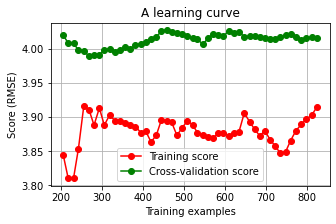

In [14]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=3, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()